## Import Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk.stem import WordNetLemmatizer
from sklearn.manifold import TSNE

## Read data

In [2]:
with open('./synonmyns_and_antonyms.txt', 'r') as file:
    content = file.read()
    print(content)

Happy
Synonyms: joyful, cheerful, content, delighted, pleased
Antonym: sad
Antonym Synonyms: unhappy, miserable, gloomy, depressed, sorrowful
Fast
Synonyms: quick, rapid, speedy, swift, brisk
Antonym: slow
Antonym Synonyms: sluggish, unhurried, gradual, lethargic, delayed

Strong
Synonyms: powerful, sturdy, tough, robust, resilient
Antonym: weak
Antonym Synonyms: fragile, feeble, frail, delicate, powerless

Clean
Synonyms: spotless, tidy, pure, hygienic, neat
Antonym: dirty
Antonym Synonyms: filthy, messy, grimy, soiled, polluted

Big
Synonyms: large, huge, massive, gigantic, enormous
Antonym: small
Antonym Synonyms: tiny, little, miniature, petite, compact

Hot
Synonyms: warm, heated, scorching, blazing, boiling
Antonym: cold
Antonym Synonyms: chilly, cool, freezing, frosty, icy

Rich
Synonyms: wealthy, affluent, prosperous, well-off, loaded
Antonym: poor
Antonym Synonyms: broke, impoverished, needy, destitute, penniless

Love
Synonyms: affection, fondness, devotion, adoration, passio

## Clean and format data

In [3]:
token_data = content.splitlines()
token_data2 = []
for i in token_data:
    token_data2.append(i.split())

In [4]:
token_data_final = []
for i in token_data2:
    for j in i:
        token_data_final.append(j)

In [6]:
def clean_text(text):
    cleaned = re.sub(r'[^\w\s]', '', text)
    return(cleaned)

In [7]:
token_data_final = [i.lower() for i in token_data_final if i not in ['synonyms:','antonym:']]
token_data_final = [clean_text(i) for i in token_data_final]

## Get Glove Embedding

In [31]:
lemmitizer = WordNetLemmatizer()
def load_glove_model(glove_dict):
    model = {}
    with open(glove_dict, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            word = lemmitizer.lemmatize(word)
            vector = np.asarray(values[1:], dtype='float32')
            model[word] = vector
    return model

glove_model = load_glove_model('./glove.6B.50d.txt')  # Example for 50-dimensional vectors

In [48]:
def get_glove_embedding(sent):
    emb_vec = []
    for token in sent:
        temp_vec = glove_model.get(token, np.zeros(50))
        #print(token)
        #print(temp_vec)
        emb_vec.append(temp_vec)
    return(emb_vec)
    

In [50]:
token_data_final_embedding = np.array(get_glove_embedding(token_data_final))

## Running t-sne

In [64]:
tsne = TSNE(n_components=2, perplexity=3)
embeddings_2d = tsne.fit_transform(np.array(token_data_final_embedding))

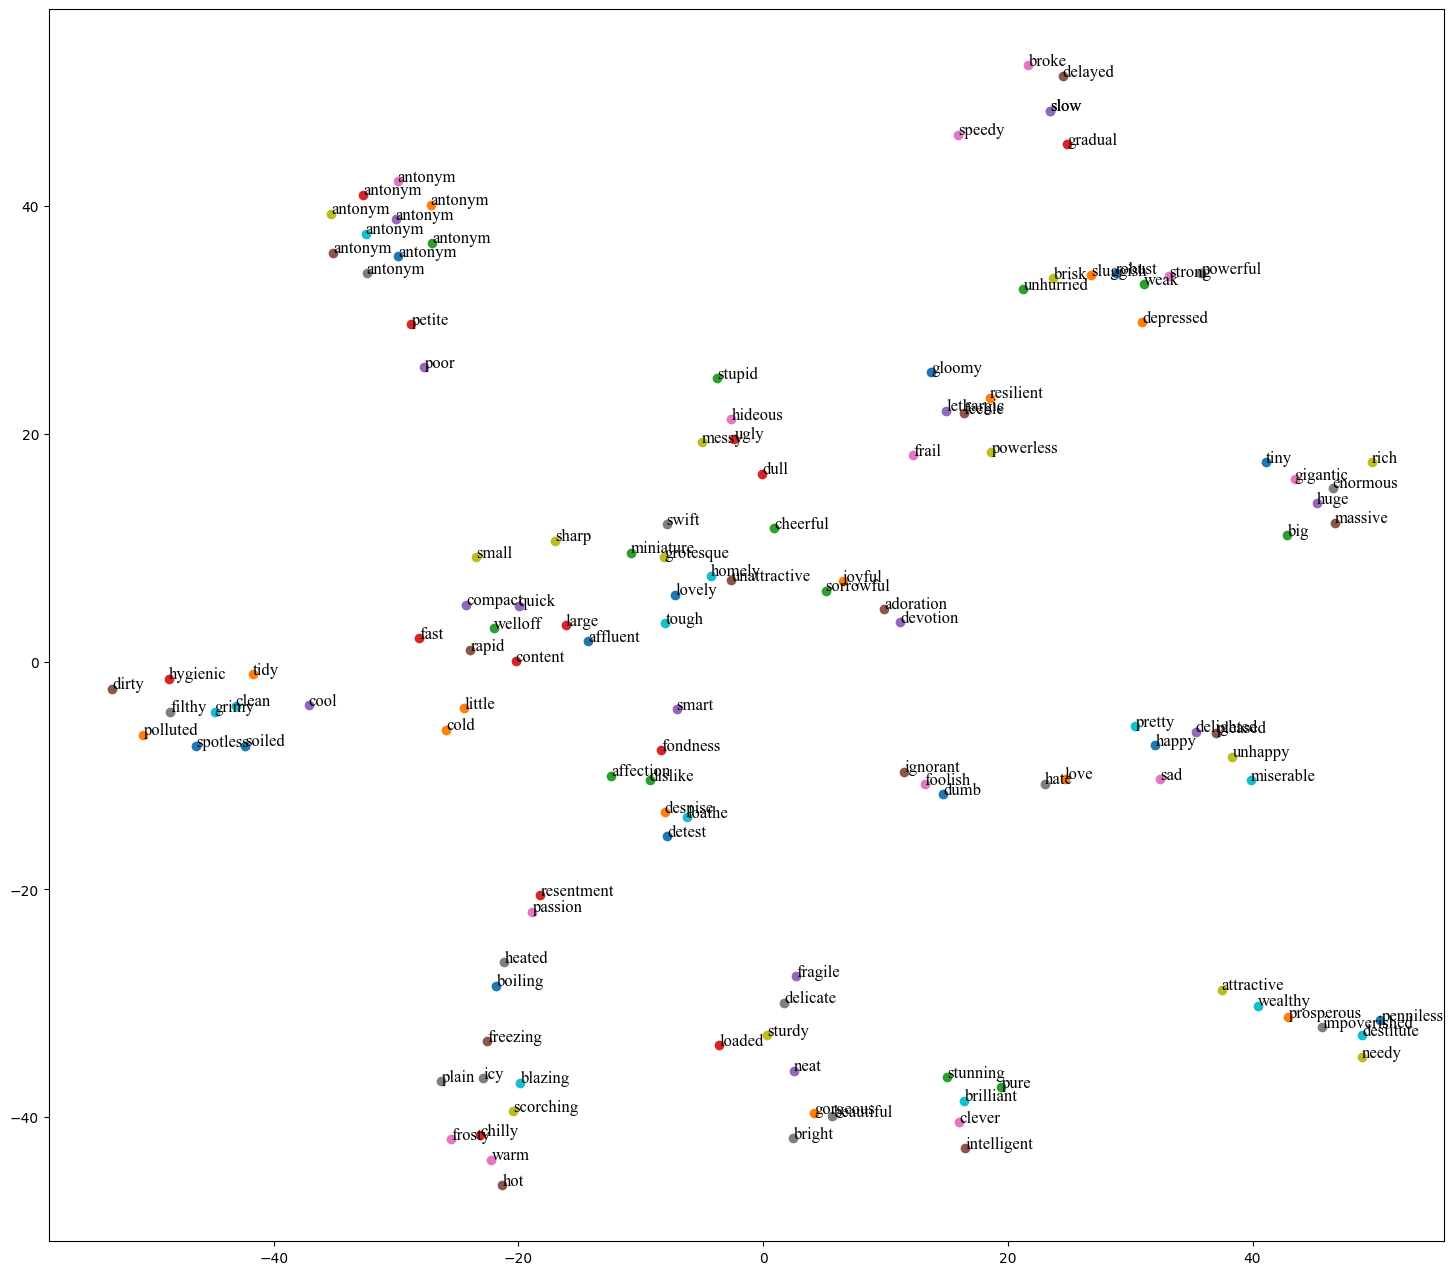

In [65]:
plt.figure(figsize=(18, 16))
for i, label in enumerate(token_data_final):
    x, y = embeddings_2d[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, label , fontdict={'family': 'Times New Roman', 'weight': 'normal', 'size': 12})

In [67]:
tsne = TSNE(n_components=2, perplexity=50)
embeddings_2d = tsne.fit_transform(np.array(token_data_final_embedding))

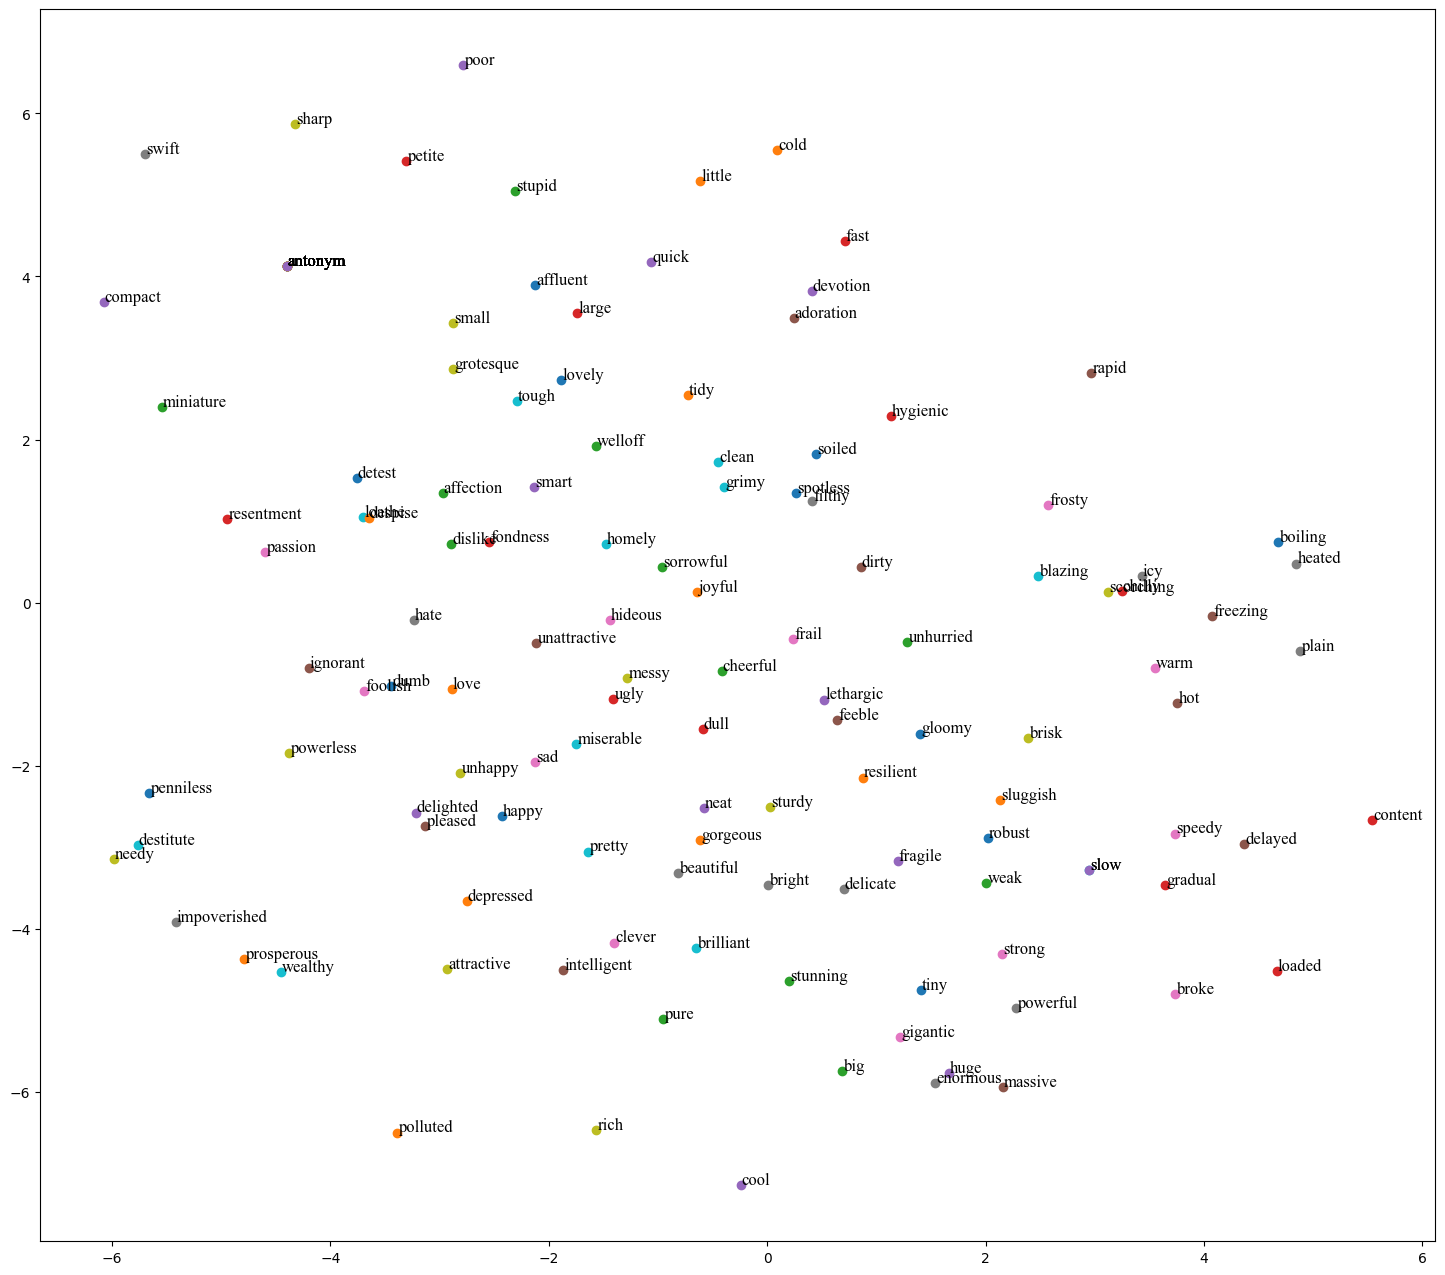

In [68]:
plt.figure(figsize=(18, 16))
for i, label in enumerate(token_data_final):
    x, y = embeddings_2d[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, label , fontdict={'family': 'Times New Roman', 'weight': 'normal', 'size': 12})